# CS4243 Lab 2: Image Segmentations

In [1]:
# Setup
%matplotlib inline
%load_ext autoreload
%autoreload 1

import cv2 
import matplotlib.pyplot as plt
import numpy as np

%aimport lab2
from lab2 import *

### Introduction
Image segmentation is the process of assigning a label to every pixel in an image such that pixels with same label share certain characteristic. In this lab assignment, you will learn how to implement image segmentation using K-means and mean shift algorithm.

The lab contains 3 parts, you will first implement different feature selection methods, which are used to compare pixel similarity in following segmentation algorithms. You will then implement K-means and mean shift algorithm on toy cluster samples. And finally you will combine the first two part to run  K-means and mean shift clustering on different image features.

References:
* Lecture 5
* lab2.pdf.

Optional references:
* Klette 5, 5.2
* Szeliski 5.3, 5.3.1, 5.3.2
* Forsyth & Ponce 15.3




### Instructions
This jupyter notebook provides the facilities to run your code and visualize the results. For each part of this assignment, you are required to **complete the implementations of certain functions in the accompanying python file** (`lab2.py`).

Besides code implementation, **you can also tweak parameter for function in this notebook** if this will give you better result.

Please note the following:
1. Detailed instructions are contained in the pdf file **( lab2.pdf )**, please refer it for more instructions.
2. The parts you need to implement are clearly marked with the following:

    ```
    """ YOUR CODE STARTS HERE """

    """ YOUR CODE ENDS HERE """
    ```
    You should only write your code in between the above two lines. Do not change the existing functions, e.g., rename the function or delete some functions.
    
3. The parameters you may change are also marked with the following:

    ```
    """ PARAMETERS HERE """

    """ PARAMETERS HERE """
    ```
    
4. Note that for each part, there may be certain functions that are prohibited. **DO NOT use those prohibited functions**. If you are not sure, please ask TA for help.


This lab contains three parts:
1. Image preprocessing and feature extraction. (5%)
2. Clustering using K-means and mean shift. (80%)
3. Image segmentation using K-means and mean shift. (15%)

## Part 1: Image Preprocessing

In the part 1 you will implement image smoothing and image color space conversion. After finishing implementation, you will see histogram or scatter graph for the image in different feature spaces.

* **Implement following function in `lab2.py`**: `smoothing()` , `RGBtoLab()`


In [2]:
# img = load_image('data/star.png')

# f1 = plt.figure(figsize=(14,5))
# # RGB
# f1.add_subplot(1,3,1)
# plt.imshow(img)
# plt.title('RGB')
# # Smoothing
# img_smoothed = smoothing(img) 
# f1.add_subplot(1,3,2)
# plt.imshow(img_smoothed)
# plt.title('Smoothed image')
# # Intensity
# f1.add_subplot(1,3,3)
# grayscale = cv2.cvtColor(img_smoothed,cv2.COLOR_RGB2GRAY)
# plt.imshow(grayscale, cmap='gray')
# plt.title('Grayscale')


# f2 = plt.figure(figsize=(14,14))
# # RGB feature space
# ax = f2.add_subplot(2, 2, 1, projection='3d')
# rgb_feature = img_smoothed.reshape((-1, 3))
# r, g, b = rgb_feature[:, 0], rgb_feature[:, 1], rgb_feature[:, 2]  
# ax.scatter(r, g, b, s=0.5)
# ax.set_zlabel('Blue', fontdict={'size': 15, 'color': 'blue'})
# ax.set_ylabel('Green', fontdict={'size': 15, 'color': 'green'})
# ax.set_xlabel('Red', fontdict={'size': 15, 'color': 'red'})
# plt.title('RGB Feature Space')

# # L*a*b feature space
# ax = f2.add_subplot(2, 2, 2, projection='3d')
# lab = RGBtoLab(img_smoothed)
# lab_feature = lab.reshape((-1, 3))
# l, a, b = lab_feature[:, 0], lab_feature[:, 1], lab_feature[:, 2]   
# ax.scatter(l, a, b, s=0.5)
# ax.set_zlabel('b', fontdict={'size': 15, 'color': 'black'})
# ax.set_ylabel('a', fontdict={'size': 15, 'color': 'black'})
# ax.set_xlabel('L', fontdict={'size': 15, 'color': 'black'})
# plt.title('L*a*b Feature Space')


# # Intensity feature space
# ax = f2.add_subplot(2, 2, 3)
# ax.hist(grayscale.ravel(),256,[0,256])
# plt.title('Intensity Feature Histogram')

# plt.show()



## Part 2: Clustering

In part 2, you will implement K-means and mean-shift clustering algorithms. Here we generate some toy cluster examples for you to test your algorithms.


In [3]:
# from sklearn import datasets
# from sklearn.cluster import SpectralClustering

# f1 = plt.figure(figsize=(16,4))
# n_samples = 400


# # Cluster 1
# f1.add_subplot(1,3,1)
# blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
# plt.scatter(blobs[:,0], blobs[:,1], s=1.5)
# plt.axis('equal')
# plt.title('Cluster 1')


# # Cluster 2
# f1.add_subplot(1,3,2)
# varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.5, 0.5], random_state = 170)[0]
# plt.scatter(varied[:, 0], varied[:, 1], s=1.5)
# plt.axis('equal')
# plt.title('Cluster 2')


# # Cluster 3
# # Anisotropicly distributed data
# X, y = datasets.make_blobs(n_samples=n_samples, random_state=250)
# transformation = [[2, -2], [0, 1]]
# aniso = np.dot(X, transformation)
# f1.add_subplot(1,3,3)
# plt.scatter(aniso[:,0], aniso[:,1], s=1.5)
# plt.axis('equal')
# plt.title('Cluster 3')


# plt.show()


### K-Means Clustering


Follow the lab instructions:

* **Implement following function in `lab2.py`**: `k_means_clustering()` 
* **Prohibited function**: `cv2.kmeans()`

In [4]:
# k = 3 # cluster number

# f1 = plt.figure(figsize=(16,4))

# # Cluster 1
# f1.add_subplot(1,3,1)
# labels, _  = k_means_clustering(blobs,k)
# color = colors(k)
# for i in range(len(labels)):
#     plt.scatter(blobs[i, 0], blobs[i, 1], color = color[int(labels[i])], s = 1.5)
# plt.title('Cluster 1 Result')

# # Cluster 2
# f1.add_subplot(1,3,2)
# labels, _  = k_means_clustering(varied,k)
# color = colors(k)
# for i in range(len(labels)):
#     plt.scatter(varied[i, 0], varied[i, 1], color = color[int(labels[i])], s = 1.5)
# plt.title('Cluster 2 Result')


# # Cluster 3
# f1.add_subplot(1,3,3)
# labels, _  = k_means_clustering(aniso,k)
# color = colors(k)
# for i in range(len(labels)):
#     plt.scatter(aniso[i, 0], aniso[i, 1], color = color[int(labels[i])], s = 1.5)
# plt.title('Cluster 3 Result')


# plt.show()


### Mean-shift clustering

Follow the lab instructions:

* **Implement following function in `lab2.py`**: `get_bin_seeds()`, `mean_shift_single_seed()`,`mean_shift_clustering()`


In [5]:
# bandwidth = 4

# f1 = plt.figure(figsize=(16,4))

# # Cluster 1
# f1.add_subplot(1,3,1)
# labels, centroids  = mean_shift_clustering(blobs, bandwidth=bandwidth)
# color = colors(len(centroids))
# for i in range(len(labels)):
#     plt.scatter(blobs[i, 0], blobs[i, 1], color = color[int(labels[i])], s = 1.5)
# plt.title('Cluster 1 Result')

# # Cluster 2
# f1.add_subplot(1,3,2)
# labels, centroids  = mean_shift_clustering(varied, bandwidth=bandwidth)
# color = colors(len(centroids))
# for i in range(len(labels)):
#     plt.scatter(varied[i, 0], varied[i, 1], color = color[int(labels[i])], s = 1.5)
# plt.title('Cluster 2 Result')


# # Cluster 3
# f1.add_subplot(1,3,3)
# labels, centroids  = mean_shift_clustering(aniso, bandwidth=bandwidth)
# color = colors(len(centroids))
# for i in range(len(labels)):
#     plt.scatter(aniso[i, 0], aniso[i, 1], color = color[int(labels[i])], s = 1.5)
# plt.title('Cluster 3 Result')

# plt.show()


## Part 3. Image Segmentation

We now combine the image features we've extract in Part 1 with the clustering algorithms implemneted in Part 2, to see what can we achieve in image segmentation.


### K-means segmentation

Follow the lab instructions:

* **Implement following function in `lab2.py`**: `k_means_segmentation()`

In [6]:
# img = load_image('data/star.png')

# f1 = plt.figure(figsize=(14,5))
# # RGB
# f1.add_subplot(1,3,1)
# plt.imshow(img)
# plt.title('RGB original')
# # Smoothing
# img_smoothed = smoothing(img) 
# f1.add_subplot(1,3,2)
# plt.imshow(img_smoothed)
# plt.title('Smoothed RGB')
# # Intensity
# f1.add_subplot(1,3,3)
# grayscale = cv2.cvtColor(img_smoothed,cv2.COLOR_RGB2GRAY)
# plt.imshow(grayscale, cmap='gray')
# plt.title('Grayscale')

# """ PARAMETERS HERE """
# k = 2
# """ PARAMETERS HERE """


# f2 = plt.figure(figsize=(14,28))
# # RGB feature space
# f2.add_subplot(2, 2, 1)
# labels, centers = k_means_segmentation(img_smoothed, k)
# rgb_seged = stack_seg(img, labels, centers)
# plt.imshow(rgb_seged)
# plt.title('RGB, K-means k={}'.format(k))

# # L*a*b feature space
# f2.add_subplot(2, 2, 2)
# lab = RGBtoLab(img_smoothed)
# labels, centers = k_means_segmentation(lab, k)
# lab_seg = stack_seg(img, labels, centers)
# plt.imshow(lab_seg)
# plt.title('L*a*b, K-means k={}'.format(k))


# # Intensity feature space
# f2.add_subplot(2, 2, 3)
# intensity = grayscale
# labels, centers = k_means_segmentation(intensity, k)
# intensity_seg = stack_seg(img, labels, centers)
# plt.imshow(intensity_seg)
# plt.title('Intensity, K-means k={}'.format(k))

# plt.show()




### Mean shift segmentation
Follow the lab instructions:

* **Implement following function in `lab2.py`**: `mean_shift_segmentation()`

TEST
HERE
3
data dim
(67500, 3)
mean shift running time: 83.525s.
HERE
3
data dim
(67500, 3)
mean shift running time: 74.969s.
HERE
2
data dim
(67500, 1)
mean shift running time: 72.402s.


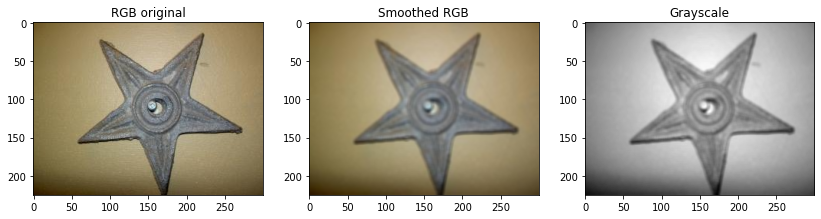

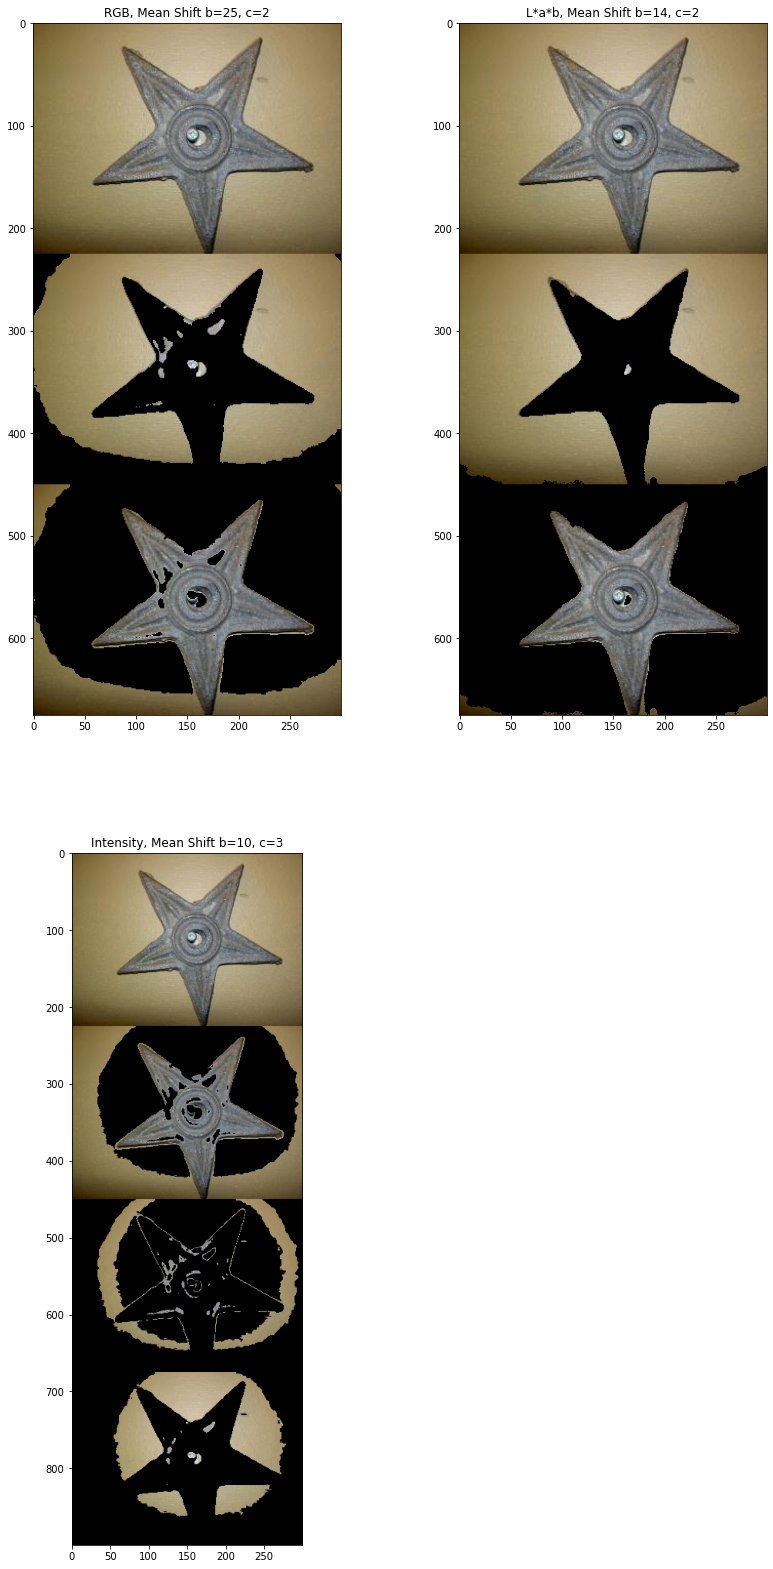

In [8]:
img = load_image('data/star.png')

f1 = plt.figure(figsize=(14,5))
# RGB
f1.add_subplot(1,3,1)
plt.imshow(img)
plt.title('RGB original')
# Smoothing
img_smoothed = smoothing(img) 
f1.add_subplot(1,3,2)
plt.imshow(img_smoothed)
plt.title('Smoothed RGB')
# Intensity
f1.add_subplot(1,3,3)
grayscale = cv2.cvtColor(img_smoothed,cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale, cmap='gray')
plt.title('Grayscale')


f2 = plt.figure(figsize=(14,28))
# RGB feature space
f2.add_subplot(2, 2, 1)

""" PARAMETERS HERE """
b1=25
""" PARAMETERS HERE """

labels, centers = mean_shift_segmentation(img_smoothed, b=b1)
rgb_seged = stack_seg(img, labels, centers)
plt.imshow(rgb_seged)
plt.title('RGB, Mean Shift b={}, c={}'.format(b1, centers.shape[0]))

# L*a*b feature space
f2.add_subplot(2, 2, 2)
lab = RGBtoLab(img_smoothed)

""" PARAMETERS HERE """
b2=14
""" PARAMETERS HERE """

labels, centers = mean_shift_segmentation(lab, b=b2)
lab_seg = stack_seg(img, labels, centers)
plt.imshow(lab_seg)
plt.title('L*a*b, Mean Shift b={}, c={}'.format(b2, centers.shape[0]))


# Intensity feature space
f2.add_subplot(2, 2, 3)
intensity = grayscale

""" PARAMETERS HERE """
b3=10
""" PARAMETERS HERE """

labels, centers = mean_shift_segmentation(intensity, b=b3)
intensity_seg = stack_seg(img, labels, centers)
plt.imshow(intensity_seg)
plt.title('Intensity, Mean Shift b={}, c={}'.format(b3, centers.shape[0]))

plt.show()

You can now test your code with more examples in the data folder.

### Submission Instructions
Files to be submitted are `lab2.py` and `lab2.ipynb`. Please zip them into a file named `AXXX_AXXX_AXXX.zip`, where `AXXX` is the student number of the group members.  Each group should submit only once. Note that we will use hold-out testing examples to test the functions in `lab2.py`. Therefore, `lab2.py` is essential and `lab2.ipynb` is for reference only in case you fail some testing cases, so please keep your jupyter outputs.

Groups with missing files or incorrectly formatted code that does not run will be penalized. The submission deadline is `01/10/2020,23:59`. Q\&A sessions for Lab 2 will be held on `15/9/2020,15:00-17:00` & `18/9/2020,09:00-11:00`.